___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://dinhanhthi.com/img/post/ML/random-forest-decision-tree/r2.jpg" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2023
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___

<p style="text-align:right;"> Imagen recuperada de: https://dinhanhthi.com/img/post/ML/random-forest-decision-tree/r2.jpg</p>

### <font color= #2E9AFE> Tema: Modelos basados en Árboles</font>

Un árbol de decisión es un conjunto de sentencias de la forma: si... entonces...

Estas sentencias dividen los datos en una serie de predictores. 

Estas divisiones de predictores son usadas para estimar la salida del modelo. 

**Ejemplo:** En un problema con dos predictores 'A' y 'B', un conjunto de sentencias de la forma:

Si el predictor 'A' >= 1.7, entonces
- Si el predictor B >=200, entonces la predicción = 1.3
- De otra forma, la predicción = 2.5

Estas sentencias están partiendo los predictores en 3 segmentos donde salidas específicas son definidas. 

**Estructura del árbol**

Toma 3 cosas en cuenta:
- Las variables predictoras (X) que se van a usar y el punto de partición del dataset.
- La profundidad/complejidad del árbol
- La ecuación de predicción en los últimos nodos/hojas del árbol

**Hiperparámetros a ajustar**
- Profundidad del árbol (max_depth)
- Número mínimo de observaciones en cada split(min_samples_split)

**Desventajas**

- Inestabilidad del modelo: Debido a que las particiones se basan en un conjunto de datos, si se generan cambios en el conjunto de datos, esto genera cambios importantes en la estructura del árbol y especialmente en su interpretabilidad.

- Rendimiento predictivo subóptimo. Nuevamente, debido a que las particiones se basan en un conjunto de datos específico, el modelo generalmente no converge con el modelo óptimo global.

In [1]:
#librerias
import numpy as np
import pandas as pd
import requests, io
import matplotlib.pyplot as plt # for data visualization
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.tree import DecisionTreeRegressor 

In [2]:
#crear datos
ColumnNames=['Hours','Calories', 'Weight']
DataValues= [[1.0,   2500,   95],[2.0,   2000,   85],[2.5,   1900,   83],[3.0,   1850,   81],[3.5,   1600,   80],[4.0,   1500,   78],
            [5.0,   1500,   77],[5.5,   1600,   80],[6.0,   1700,   75],[6.5,   1500,   70]]

GymData=pd.DataFrame(data=DataValues,columns=ColumnNames)
GymData.head()


,Hours,Calories,Weight
0,1.0,2500,95
1,2.0,2000,85
2,2.5,1900,83
3,3.0,1850,81
4,3.5,1600,80


In [3]:
#Separate Target Variable and Predictor Variables
TargetVariable='Weight'
Predictors=['Hours','Calories']
X=GymData[Predictors].values
y=GymData[TargetVariable].values

In [4]:
#dividir en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
#Inicializar el modelo
model = DecisionTreeRegressor(random_state = 0)
# entrenar el modelo 
model.fit(x_train, y_train) 

DecisionTreeRegressor(random_state=0)

In [6]:
# Prediciendo en los datos de prueba
y_pred = model.predict(x_test)

In [7]:
# calcular el error cuadrático medio
mse = float(format(mean_squared_error(y_test, y_pred), '.3f'))
print("MSE: ", mse)

MSE:  14.5


In [8]:
#calcular la r2
r2 = r2_score(y_test, y_pred)
print("R2: ", r2)

R2:  0.42000000000000004


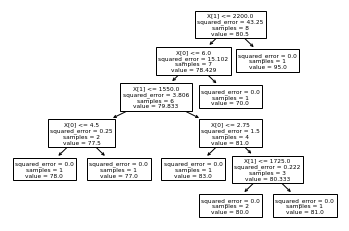

In [9]:
#visualizar el árbol
from sklearn import tree
tree.plot_tree(model)
plt.show()

In [10]:
#Exportar el árbol
import graphviz

dot_data = tree.export_graphviz(model, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("trees_gen/tree_multipredict")

'trees_gen\\tree_multipredict.pdf'

Como observamos, el árbol está sobreajustando ya que tiene sólo un dato en cada hoja final

**Ventajas de los árboles de decisión**

- No requiere escalamiento de variables
- Puede  ser usado para datos no lineales
- Fácil de visualizar
- Fácil de interpretar

**Desventajas de los árboles de decisión**

- Es computancionalmente complejo, especialmente al usar cross-validation para ajustar los hiperparámetros
- Un cambio pequeño en los datos puede causar grandes cambios en la estructura del árbol